## Biomass and butyrate production in function of $o_2$ and $gluc$

found units here 

https://cnls.lanl.gov/external/qbio2018/Slides/FBA%202/qBio-FBA-lab-slides.pdf


- Growth Rate (1/h): 0.76
- Lycopene Production Rate (mmol/gdcw/h): 0.2496
- Lycopene Yield (mol/mol glucose): 0.02496


In [1]:
import cobra
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
cerevisiaeMod1 = cobra.io.load_json_model('./cerevisiaeMod1.json')
cerevisiaeMod1a = cobra.io.load_json_model('./cerevisiaeMod1a.json')
cerevisiaeMod2 = cobra.io.load_json_model('./cerevisiaeMod2.json')
cerevisiaeMod3 = cobra.io.load_json_model('./cerevisiaeMod3.json')

cerevisiaeMod1.objective = cerevisiaeMod1.add_boundary(cerevisiaeMod1.metabolites.but_c, type='demand')
cerevisiaeMod1a.objective = cerevisiaeMod1a.add_boundary(cerevisiaeMod1a.metabolites.but_c, type='demand')
cerevisiaeMod2.objective = cerevisiaeMod2.add_boundary(cerevisiaeMod2.metabolites.but_c, type='demand')
cerevisiaeMod3.objective = cerevisiaeMod3.add_boundary(cerevisiaeMod3.metabolites.but_c, type='demand')

In [4]:
cerevisiaeMod1.reactions.EX_o2_e

Reaction identifier,EX_o2_e
Name,O2 exchange
Memory address,0x07da960be80
Stoichiometry,o2_e <=> O2 O2 <=>
GPR,
Lower bound,-2.0
Upper bound,999999.0


In [5]:
def o2Uptake(lam):
    
    biomass = cerevisiaeMod2.reactions.BIOMASS_SC5_notrace.flux_expression
    
    but1 = cerevisiaeMod1.reactions.DM_but_c.flux_expression
    but1a = cerevisiaeMod1a.reactions.DM_but_c.flux_expression
    but2 = cerevisiaeMod2.reactions.DM_but_c.flux_expression
    but3 = cerevisiaeMod3.reactions.DM_but_c.flux_expression


    biomass_but1 = cerevisiaeMod1.problem.Objective(biomass + lam*but1,
        direction='max')
    biomass_but1a = cerevisiaeMod1a.problem.Objective(biomass + lam*but1a,
        direction='max')
    biomass_but2 = cerevisiaeMod2.problem.Objective(biomass + lam*but2,
        direction='max')
    biomass_but3 = cerevisiaeMod3.problem.Objective(biomass + lam*but3,
        direction='max')


    cerevisiaeMod1.objective = biomass_but1
    cerevisiaeMod1a.objective = biomass_but1a
    cerevisiaeMod2.objective = biomass_but2
    cerevisiaeMod3.objective = biomass_but3


    o2 = np.arange(0., 20., 0.5)
    no2 = len(o2)

    buts1_o2 = np.repeat(0.0, no2)
    buts1a_o2 = np.repeat(0.0, no2)
    buts2_o2 = np.repeat(0.0, no2)
    buts3_o2 = np.repeat(0.0, no2)

    biomasses1_o2 = np.repeat(0.0, no2)
    biomasses1a_o2 = np.repeat(0.0, no2)
    biomasses2_o2 = np.repeat(0.0, no2)
    biomasses3_o2 = np.repeat(0.0, no2)

    for i, o in enumerate(o2):

        cerevisiaeMod1.reactions.EX_o2_e.lower_bound = -o
        cerevisiaeMod1.reactions.EX_o2_e.upper_bound = -o
        cerevisiaeMod1a.reactions.EX_o2_e.lower_bound = -o
        cerevisiaeMod1a.reactions.EX_o2_e.upper_bound = -o
        cerevisiaeMod2.reactions.EX_o2_e.lower_bound = -o
        cerevisiaeMod2.reactions.EX_o2_e.upper_bound = -o
        cerevisiaeMod3.reactions.EX_o2_e.lower_bound = -o
        cerevisiaeMod3.reactions.EX_o2_e.upper_bound = -o

        solution1 = cerevisiaeMod1.optimize(objective_sense=None)
        solution1a = cerevisiaeMod1a.optimize(objective_sense=None)
        solution2 = cerevisiaeMod2.optimize(objective_sense=None)
        solution3 = cerevisiaeMod3.optimize(objective_sense=None)


        buts1_o2[i] = solution1.fluxes.DM_but_c
        buts1a_o2[i] = solution1a.fluxes.DM_but_c
        buts2_o2[i] = solution2.fluxes.DM_but_c
        buts3_o2[i] = solution3.fluxes.DM_but_c

        biomasses1_o2[i] = solution1.fluxes.BIOMASS_SC5_notrace
        biomasses1a_o2[i] = solution1a.fluxes.BIOMASS_SC5_notrace
        biomasses2_o2[i] = solution2.fluxes.BIOMASS_SC5_notrace
        biomasses3_o2[i] = solution3.fluxes.BIOMASS_SC5_notrace        
    
    data = {'o2' : o2, 
            'buts1_o2' : buts1_o2, 'buts1a_o2' : buts1a_o2, 'buts2_o2' : buts2_o2, 'buts3_o2' : buts3_o2, 
            'biomasses1_o2' : biomasses1_o2, 'biomasses1a_o2' : biomasses1a_o2, 
            'biomasses2_o2' : biomasses2_o2, 'biomasses3_o2' : biomasses3_o2}
    
    return(data)

In [6]:
def gluUptake(lam):
    
    glc = np.arange(1.8, 30., 0.2)
    nglc = len(glc)

    buts1_glc = np.repeat(0.0, nglc)
    buts1a_glc = np.repeat(0.0, nglc)
    buts2_glc = np.repeat(0.0, nglc)
    buts3_glc = np.repeat(0.0, nglc)

    biomasses1_glc = np.repeat(0.0, nglc)
    biomasses1a_glc = np.repeat(0.0, nglc)
    biomasses2_glc = np.repeat(0.0, nglc)
    biomasses3_glc = np.repeat(0.0, nglc)

    for i, g in enumerate(glc):

        cerevisiaeMod1.reactions.EX_glc__D_e.lower_bound = -g
        cerevisiaeMod1.reactions.EX_glc__D_e.upper_bound = -g
        cerevisiaeMod1a.reactions.EX_glc__D_e.lower_bound = -g
        cerevisiaeMod1a.reactions.EX_glc__D_e.upper_bound = -g
        cerevisiaeMod2.reactions.EX_glc__D_e.lower_bound = -g
        cerevisiaeMod2.reactions.EX_glc__D_e.upper_bound = -g
        cerevisiaeMod3.reactions.EX_glc__D_e.lower_bound = -g
        cerevisiaeMod3.reactions.EX_glc__D_e.upper_bound = -g

        solution1 = cerevisiaeMod1.optimize(objective_sense=None)
        solution1a = cerevisiaeMod1a.optimize(objective_sense=None)
        solution2 = cerevisiaeMod2.optimize(objective_sense=None)
        solution3 = cerevisiaeMod3.optimize(objective_sense=None)

        buts1_glc[i] = solution1.fluxes.DM_but_c
        buts1a_glc[i] = solution1a.fluxes.DM_but_c
        buts2_glc[i] = solution2.fluxes.DM_but_c
        buts3_glc[i] = solution3.fluxes.DM_but_c

        biomasses1_glc[i] = solution1.fluxes.BIOMASS_SC5_notrace
        biomasses1a_glc[i] = solution1a.fluxes.BIOMASS_SC5_notrace
        biomasses2_glc[i] = solution2.fluxes.BIOMASS_SC5_notrace
        biomasses3_glc[i] = solution3.fluxes.BIOMASS_SC5_notrace
    
    data = {'glc' : glc,
            'buts1_glc' : buts1_glc, 'buts1a_glc' : buts1a_glc, 'buts2_glc' : buts2_glc, 'buts3_glc' : buts3_glc, 
            'biomasses1_glc' : biomasses1_glc, 'biomasses1a_glc' : biomasses1a_glc,
            'biomasses2_glc' : biomasses2_glc, 'biomasses3_glc' : biomasses3_glc}
    
    return(data)


In [7]:
data002 = o2Uptake(lam=0.02)

In [8]:
cerevisiaeMod1 = cobra.io.load_json_model('./cerevisiaeMod1.json')
cerevisiaeMod1a = cobra.io.load_json_model('./cerevisiaeMod1a.json')
cerevisiaeMod2 = cobra.io.load_json_model('./cerevisiaeMod2.json')
cerevisiaeMod3 = cobra.io.load_json_model('./cerevisiaeMod3.json')

cerevisiaeMod1.objective = cerevisiaeMod1.add_boundary(cerevisiaeMod1.metabolites.but_c, type='demand')
cerevisiaeMod1a.objective = cerevisiaeMod1a.add_boundary(cerevisiaeMod1a.metabolites.but_c, type='demand')
cerevisiaeMod2.objective = cerevisiaeMod2.add_boundary(cerevisiaeMod2.metabolites.but_c, type='demand')
cerevisiaeMod3.objective = cerevisiaeMod3.add_boundary(cerevisiaeMod3.metabolites.but_c, type='demand')

data006 = o2Uptake(lam=0.06)

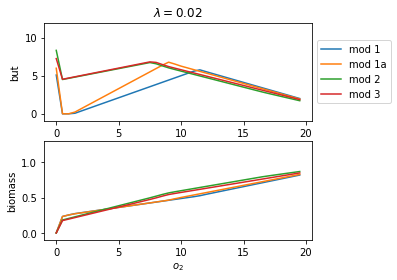

In [12]:
ax1 = plt.subplot(2, 1, 1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.plot(data002['o2'], data002['buts1_o2'], label="mod 1")
plt.plot(data002['o2'], data002['buts1a_o2'], label="mod 1a")
plt.plot(data002['o2'], data002['buts2_o2'], label="mod 2")
plt.plot(data002['o2'], data002['buts3_o2'], label="mod 3")

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(-1, 12)
plt.ylabel('but')
plt.title('$\lambda = 0.02$')

plt.subplot(2, 1, 2)
plt.plot(data002['o2'], data002['biomasses1_o2'], label="mod 1")
plt.plot(data002['o2'], data002['biomasses1a_o2'], label="mod 1a")
plt.plot(data002['o2'], data002['biomasses2_o2'], label="mod 2")
plt.plot(data002['o2'], data002['biomasses3_o2'], label="mod 3")

ax2 = plt.subplot(2, 1, 2)
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])

plt.ylim(-0.1, 1.3)
plt.ylabel('biomass')
plt.xlabel('$o_2$')

plt.savefig('oxigenUptake_lam002.png', format='png', dpi=500)
plt.show()

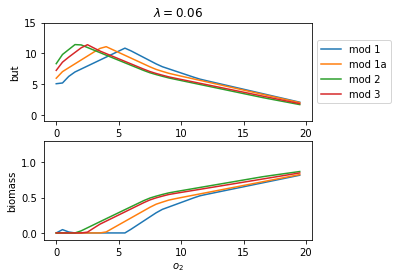

In [13]:
ax1 = plt.subplot(2, 1, 1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.plot(data006['o2'], data006['buts1_o2'], label="mod 1")
plt.plot(data006['o2'], data006['buts1a_o2'], label="mod 1a")
plt.plot(data006['o2'], data006['buts2_o2'], label="mod 2")
plt.plot(data006['o2'], data006['buts3_o2'], label="mod 3")

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(-1, 15)
plt.ylabel('but')
plt.title('$\lambda = 0.06$')

plt.subplot(2, 1, 2)
plt.plot(data006['o2'], data006['biomasses1_o2'], label="mod 1")
plt.plot(data006['o2'], data006['biomasses1a_o2'], label="mod 1a")
plt.plot(data006['o2'], data006['biomasses2_o2'], label="mod 2")
plt.plot(data006['o2'], data006['biomasses3_o2'], label="mod 3")

ax2 = plt.subplot(2, 1, 2)
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])

plt.ylim(-0.1, 1.3)
plt.ylabel('biomass')
plt.xlabel('$o_2$')

plt.savefig('oxigenUptake_lam006.png', format='png', dpi=500)
plt.show()

In [14]:
cerevisiaeMod1 = cobra.io.load_json_model('./cerevisiaeMod1.json')
cerevisiaeMod1a = cobra.io.load_json_model('./cerevisiaeMod1a.json')
cerevisiaeMod2 = cobra.io.load_json_model('./cerevisiaeMod2.json')
cerevisiaeMod3 = cobra.io.load_json_model('./cerevisiaeMod3.json')

cerevisiaeMod1.objective = cerevisiaeMod1.add_boundary(cerevisiaeMod1.metabolites.but_c, type='demand')
cerevisiaeMod1a.objective = cerevisiaeMod1a.add_boundary(cerevisiaeMod1a.metabolites.but_c, type='demand')
cerevisiaeMod2.objective = cerevisiaeMod2.add_boundary(cerevisiaeMod2.metabolites.but_c, type='demand')
cerevisiaeMod3.objective = cerevisiaeMod3.add_boundary(cerevisiaeMod3.metabolites.but_c, type='demand')


data002glu = gluUptake(lam=0.02)

In [15]:
cerevisiaeMod1 = cobra.io.load_json_model('./cerevisiaeMod1.json')
cerevisiaeMod1a = cobra.io.load_json_model('./cerevisiaeMod1a.json')
cerevisiaeMod2 = cobra.io.load_json_model('./cerevisiaeMod2.json')
cerevisiaeMod3 = cobra.io.load_json_model('./cerevisiaeMod3.json')

cerevisiaeMod1.objective = cerevisiaeMod1.add_boundary(cerevisiaeMod1.metabolites.but_c, type='demand')
cerevisiaeMod1a.objective = cerevisiaeMod1a.add_boundary(cerevisiaeMod1a.metabolites.but_c, type='demand')
cerevisiaeMod2.objective = cerevisiaeMod2.add_boundary(cerevisiaeMod2.metabolites.but_c, type='demand')
cerevisiaeMod3.objective = cerevisiaeMod3.add_boundary(cerevisiaeMod3.metabolites.but_c, type='demand')


data006glu = gluUptake(lam=0.06)

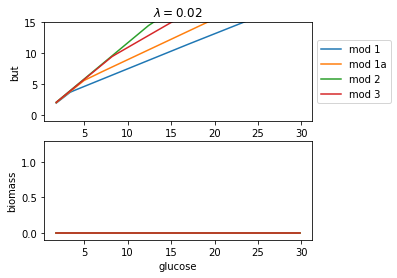

In [16]:
ax1 = plt.subplot(2, 1, 1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.plot(data002glu['glc'], data002glu['buts1_glc'], label="mod 1")
plt.plot(data002glu['glc'], data002glu['buts1a_glc'], label="mod 1a")
plt.plot(data002glu['glc'], data002glu['buts2_glc'], label="mod 2")
plt.plot(data002glu['glc'], data002glu['buts3_glc'], label="mod 3")

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(-1, 15)
plt.ylabel('but')
plt.title('$\lambda = 0.02$')

ax2 = plt.subplot(2, 1, 2)
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])

plt.plot(data002glu['glc'], data002glu['biomasses1_glc'], label="mod 1")
plt.plot(data002glu['glc'], data002glu['biomasses1a_glc'], label="mod 1a")
plt.plot(data002glu['glc'], data002glu['biomasses2_glc'], label="mod 2")
plt.plot(data002glu['glc'], data002glu['biomasses3_glc'], label="mod 3")

plt.ylim(-0.1, 1.3)
plt.ylabel('biomass')
plt.xlabel('glucose')

plt.savefig('glucoseUptake_lam002.png', format='png', dpi=500)
plt.show()

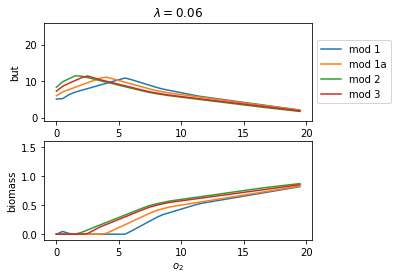

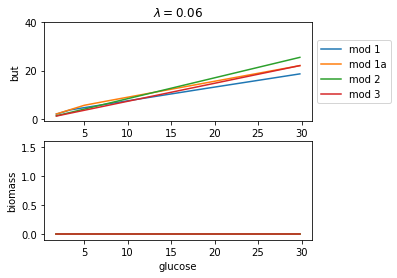

In [30]:
ax1 = plt.subplot(2, 1, 1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.plot(data006glu['glc'], data006glu['buts1_glc'], label="mod 1")
plt.plot(data006glu['glc'], data006glu['buts1a_glc'], label="mod 1a")
plt.plot(data006glu['glc'], data006glu['buts2_glc'], label="mod 2")
plt.plot(data006glu['glc'], data006glu['buts3_glc'], label="mod 3")

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(-1, 40)
plt.ylabel('but')
plt.title('$\lambda = 0.06$')

ax2 = plt.subplot(2, 1, 2)
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])

plt.plot(data006glu['glc'], data006glu['biomasses1_glc'], label="mod 1")
plt.plot(data006glu['glc'], data006glu['biomasses1a_glc'], label="mod 1a")
plt.plot(data006glu['glc'], data006glu['biomasses2_glc'], label="mod 2")
plt.plot(data006glu['glc'], data006glu['biomasses3_glc'], label="mod 3")

plt.ylim(-0.1, 1.6)
plt.ylabel('biomass')
plt.xlabel('glucose')

plt.savefig('glucoseUptake_lam006.png', format='png', dpi=500)
plt.show()

# Single genes deletion

In [86]:
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

In [95]:
SGD1 = single_gene_deletion(cerevisiaeMod1, return_frame=True)
SGD1a = single_gene_deletion(cerevisiaeMod1a, return_frame=True)
SGD2 = single_gene_deletion(cerevisiaeMod2, return_frame=True)
SGD3 = single_gene_deletion(cerevisiaeMod3, return_frame=True)

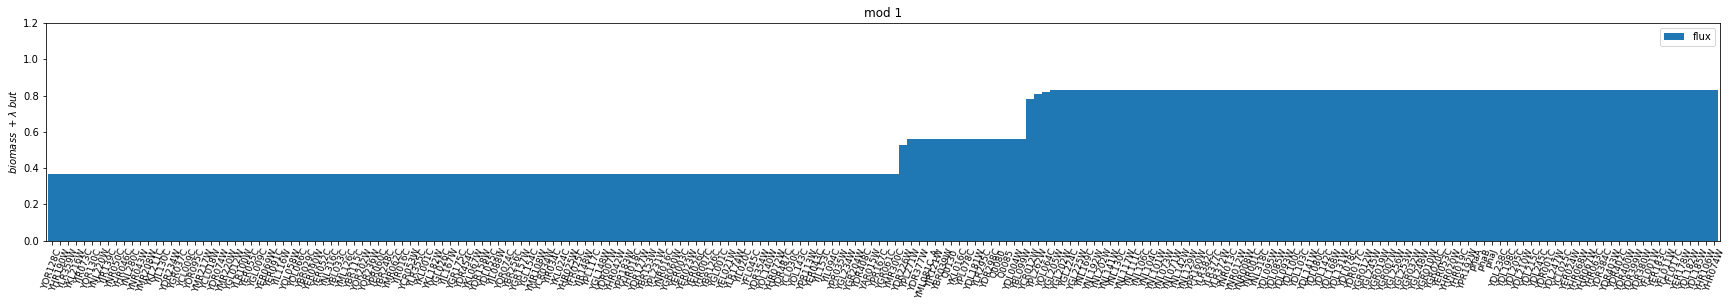

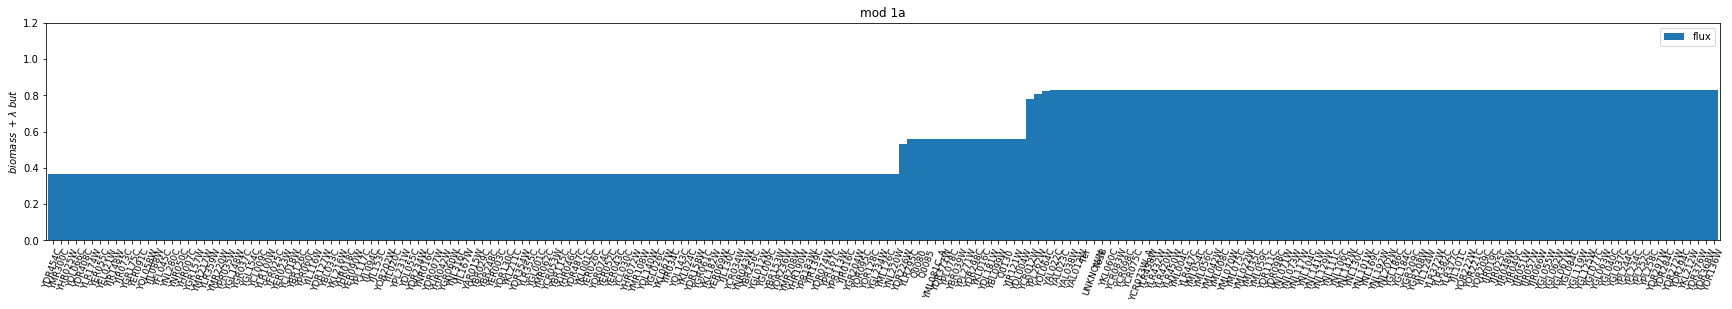

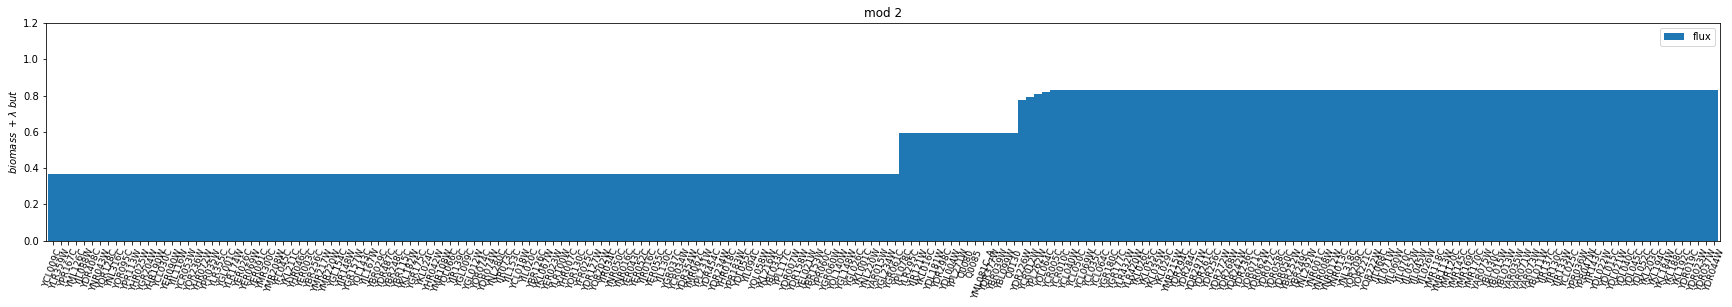

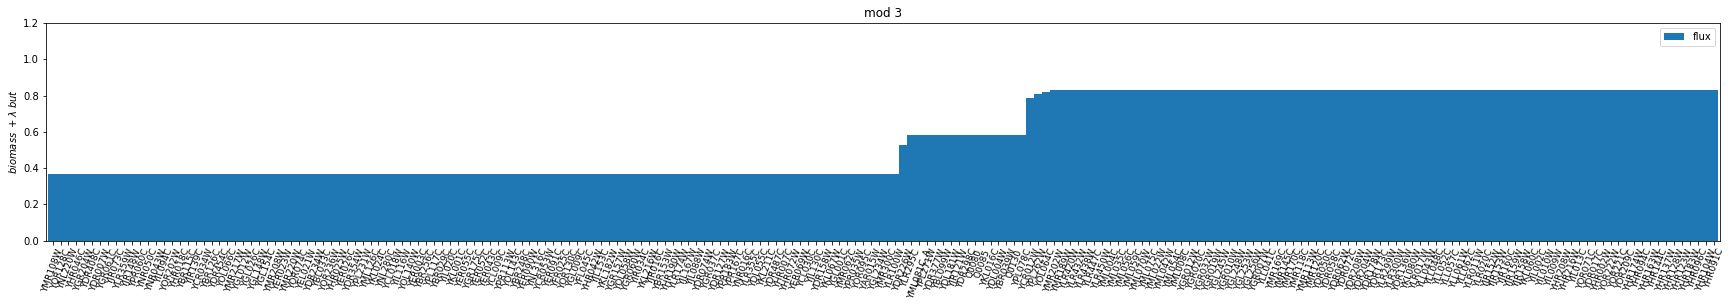

In [88]:
SGD1.sort_values(by='flux', ascending=True).head(210).plot.bar(width=1, figsize=(30, 4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70, fontsize = 9)
plt.ylim(0, 1.2)
plt.title('mod 1')
plt.ylabel('$biomass \  + \lambda \ but$')

SGD1a.sort_values(by='flux', ascending=True).head(210).plot.bar(width=1.1, figsize=(30, 4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70, fontsize = 9)
plt.ylim(0, 1.2)
plt.title('mod 1a')
plt.ylabel('$biomass \  + \lambda \ but$')

SGD2.sort_values(by='flux', ascending=True).head(210).plot.bar(width=1.1, figsize=(30, 4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70, fontsize = 9)
plt.ylim(0, 1.2)
plt.title('mod 2')
plt.ylabel('$biomass \  + \lambda \ but$')

SGD3.sort_values(by='flux', ascending=True).head(210).plot.bar(width=1.1, figsize=(30, 4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70, fontsize = 9)
plt.ylim(0, 1.2)
plt.title('mod 3')
plt.ylabel('$biomass \  + \lambda \ but$')

plt.show()